#### INTEGRANTES 
Pedro Sierra  
Tomás Lopera  
Pablo García   
Juan José Londoño  

In [1]:
import pandas as pd


df = pd.read_csv('store.csv', encoding='cp1252')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

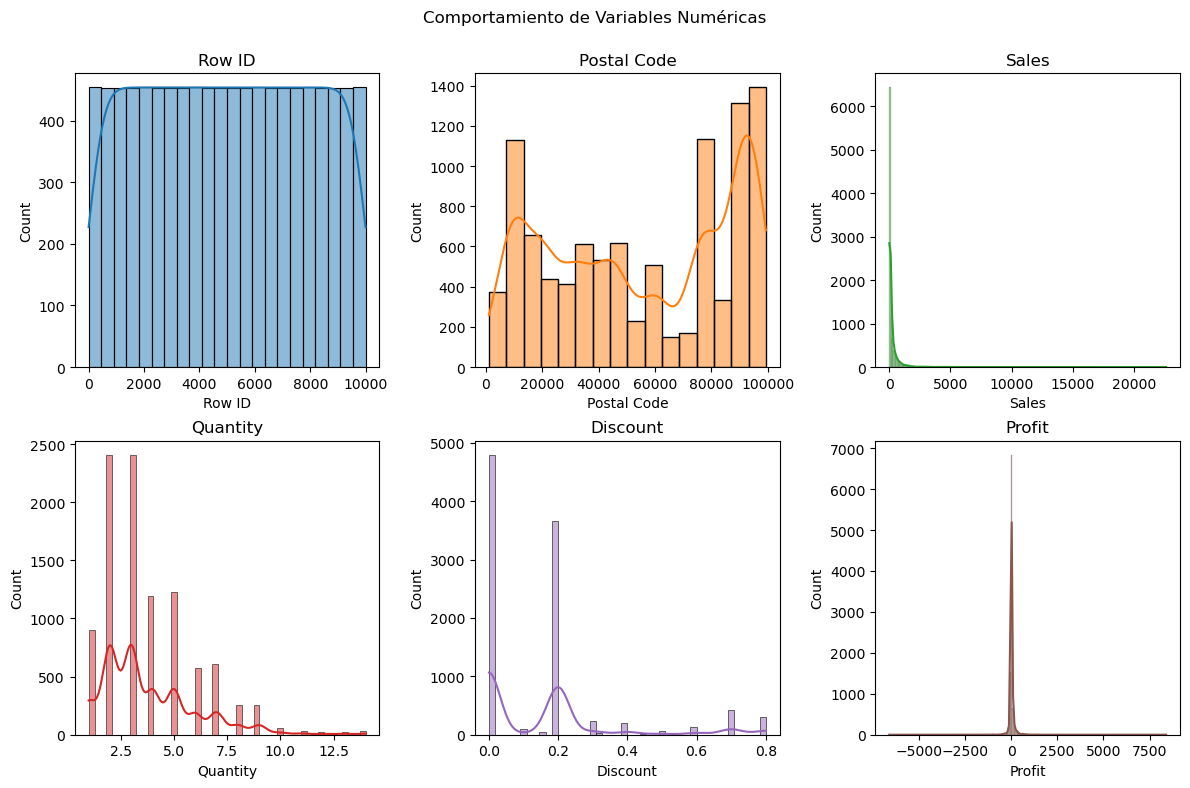

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
ax = ax.flat
num_col = df.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = df, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()


In [4]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(6, 3, figsize = (12, 12))
ax = ax.flat
cat_col = df.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = df[col].value_counts(), labels = df[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20860\2271432118.py:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


KeyboardInterrupt: 

In [19]:
df['City'].value_counts()

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Abilene            1
Montebello         1
Kissimmee          1
Danbury            1
Springdale         1
Name: count, Length: 531, dtype: int64

In [5]:
import pandas as pd
from geopy.geocoders import Nominatim
from tqdm import tqdm
import time

# --- 1. Cargar tu dataset ---

# --- 2. Inicializar geolocalizador ---
geolocator = Nominatim(user_agent="geoapi")

# --- 3. Función para obtener coordenadas ---
def get_coordinates(city):
    try:
        location = geolocator.geocode(f"{city}, USA")
        if location:
            return pd.Series([location.latitude, location.longitude])
    except:
        return pd.Series([None, None])
    return pd.Series([None, None])

# --- 4. Aplicar solo a ciudades únicas ---
tqdm.pandas()
unique_cities = df[['City']].drop_duplicates().reset_index(drop=True)

# Añadir columnas de latitud y longitud
unique_cities[['Latitude', 'Longitude']] = unique_cities.progress_apply(
    lambda x: get_coordinates(x['City']),
    axis=1
)

# --- 5. Unir coordenadas al dataset original ---
df = df.merge(unique_cities, on='City', how='left')




100%|██████████| 531/531 [12:30<00:00,  1.41s/it]


In [6]:
# guardar el nuevo dataset con las coordenadas
df.to_csv('store_with_coordinates.csv', index=False)

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Latitude,Longitude
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,32.182598,-95.789318
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,32.182598,-95.789318
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN,NaN
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,26.122308,-80.143379
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,26.122308,-80.143379


| #  | Nombre          | Tipo de Dato               |
|----|-----------------|----------------------------|
| 0  | Row ID          | Cuantitativa Discreta      |
| 1  | Order ID        | Cualitativa Nominal        |
| 2  | Order Date      | Ordinal Temporal           |
| 3  | Ship Date       | Ordinal Temporal           |
| 4  | Ship Mode       | Cualitativa Nominal        |
| 5  | Customer ID     | Cualitativa Nominal        |
| 6  | Customer Name   | Cualitativa Nominal        |
| 7  | Segment         | Cualitativa Nominal        |
| 8  | Country         | Cualitativa Nominal        |
| 9  | City            | Cualitativa Nominal        |
| 10 | State           | Cualitativa Nominal        |
| 11 | Postal Code     | Cuantitativa Discreta      |
| 12 | Region          | Cualitativa Nominal        |
| 13 | Product ID      | Cualitativa Nominal        |
| 14 | Category        | Cualitativa Nominal        |
| 15 | Sub-Category    | Cualitativa Nominal        |
| 16 | Product Name    | Cualitativa Nominal        |
| 17 | Sales           | Cuantitativa Continua       |
| 18 | Quantity        | Cuantitativa Discreta       |
| 19 | Discount        | Cuantitativa Continua       |
| 20 | Profit          | Cuantitativa Continua       |


1. Analizar el comportamiento de las ventas totales y la rentabilidad a lo largo del tiempo.
{Summarize, Trends}

2. Identificar productos o categorías con mayores ventas.
{Compare, Ranking}

3. Medir el desempeño por ciudad para detectar oportunidades de expansión o mejora.
{Compare, Geographic}

5. Controlar los tiempos de envío (Order vs Ship Date) y su relación con la satisfacción o eficiencia logística.
{Compare, Performance}

6. Detectar pedidos o segmentos con márgenes negativos o ventas atípicas.
{Identify, Outliers}